# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [618]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

In [619]:
import sklearn.preprocessing

### Грузим данные

Считаем описание данных

In [620]:

df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [621]:
df_descr


,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [622]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [623]:
df_train.columns

Index(['AGREEMENT_RK', 'TARGET', 'AGE', 'SOCSTATUS_WORK_FL',
       'SOCSTATUS_PENS_FL', 'GENDER', 'CHILD_TOTAL', 'DEPENDANTS', 'EDUCATION',
       'MARITAL_STATUS', 'GEN_INDUSTRY', 'GEN_TITLE', 'ORG_TP_STATE',
       'ORG_TP_FCAPITAL', 'JOB_DIR', 'FAMILY_INCOME', 'PERSONAL_INCOME',
       'REG_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE',
       'POSTAL_ADDRESS_PROVINCE', 'TP_PROVINCE', 'REGION_NM', 'REG_FACT_FL',
       'FACT_POST_FL', 'REG_POST_FL', 'REG_FACT_POST_FL',
       'REG_FACT_POST_TP_FL', 'FL_PRESENCE_FL', 'OWN_AUTO', 'AUTO_RUS_FL',
       'HS_PRESENCE_FL', 'COT_PRESENCE_FL', 'GAR_PRESENCE_FL',
       'LAND_PRESENCE_FL', 'CREDIT', 'TERM', 'FST_PAYMENT', 'DL_DOCUMENT_FL',
       'GPF_DOCUMENT_FL', 'FACT_LIVING_TERM', 'WORK_TIME', 'FACT_PHONE_FL',
       'REG_PHONE_FL', 'GEN_PHONE_FL', 'LOAN_NUM_TOTAL', 'LOAN_NUM_CLOSED',
       'LOAN_NUM_PAYM', 'LOAN_DLQ_NUM', 'LOAN_MAX_DLQ', 'LOAN_AVG_DLQ_AMT',
       'LOAN_MAX_DLQ_AMT', 'PREVIOUS_CARD_NUM_UTILIZED'],
      dtype='object')

In [624]:
df_train.shape

(15223, 52)

In [625]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [626]:
df_test.shape
df_test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14910 entries, 0 to 14909
Data columns (total 52 columns):
AGREEMENT_RK                  14910 non-null int64
TARGET                        14910 non-null int64
AGE                           14910 non-null int64
SOCSTATUS_WORK_FL             14910 non-null int64
SOCSTATUS_PENS_FL             14910 non-null int64
GENDER                        14910 non-null int64
CHILD_TOTAL                   14910 non-null int64
DEPENDANTS                    14910 non-null int64
EDUCATION                     14910 non-null object
MARITAL_STATUS                14910 non-null object
GEN_INDUSTRY                  13564 non-null object
GEN_TITLE                     13564 non-null object
ORG_TP_STATE                  13564 non-null object
ORG_TP_FCAPITAL               13567 non-null object
JOB_DIR                       13564 non-null object
FAMILY_INCOME                 14910 non-null object
PERSONAL_INCOME               14910 non-null object
REG_ADDRESS_PRO

## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [627]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED,sample
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,1,1,1,6,2,1,1580,1580,NaN,train
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,1,1,1,6,1,1,4020,4020,NaN,train
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,1,2,1,11,0,0,0,0,NaN,train
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,6,3,1,"1589,92333333333",1590,NaN,train
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,1,2,1,16,2,1,"1152,15",2230,NaN,train


In [628]:
df = df_test.append(df_train).reset_index(drop=True)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [629]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [630]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Высшее', 'Неполное среднее', 'Два и более высших образования', 'Неоконченное высшее', 'Среднее', 'Ученая степень', 'Среднее специальное'}


MARITAL_STATUS
{'Вдовец/Вдова', 'Разведен(а)', 'Не состоял в браке', 'Состою в браке', 'Гражданский брак'}


GEN_INDUSTRY
{nan, 'Недвижимость', 'Здравоохранение', 'Наука', 'Коммунальное хоз-во/Дорожные службы', 'Юридические услуги/нотариальные услуги', 'Салоны красоты и здоровья', 'Управляющая компания', 'Развлечения/Искусство', 'Логистика', 'Образование', 'Торговля', 'Строительство', 'Маркетинг', 'Транспорт', 'Другие сферы', 'Туризм', 'Банк/Финансы', 'Металлургия/Промышленность/Машиностроение', 'Сборочные производства', 'ЧОП/Детективная д-ть', 'Нефтегазовая промышленность', 'Подбор персонала', 'СМИ/Реклама/PR-агенства', 'Химия/Парфюмерия/Фармацевтика', 'Информационные технологии', 'Энергетика', 'Государственная служба', 'Страхование', 'Информационные услуги', 'Ресторанный бизнес/Общественное питание', 'Сельское хозяйство'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [631]:
df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

0         7000.0
1         4100.0
2        40000.0
3        20000.0
4        17000.0
5         7000.0
6        10000.0
7         7500.0
8         9000.0
9         4000.0
10       15000.0
11       12000.0
12        8000.0
13       20000.0
14       18500.0
15       14000.0
16        6000.0
17        9000.0
18        5000.0
19       15000.0
20        6100.0
21       22180.0
22        9000.0
23        8700.0
24        7000.0
25        6000.0
26       15000.0
27       12000.0
28       11000.0
29        8000.0
          ...   
30103    12000.0
30104    10000.0
30105    10000.0
30106     8000.0
30107    11000.0
30108     7000.0
30109    10000.0
30110     8000.0
30111    25000.0
30112    10000.0
30113    12000.0
30114     7000.0
30115    12000.0
30116    14500.0
30117    12000.0
30118     8000.0
30119     7000.0
30120    10000.0
30121    10000.0
30122    10000.0
30123    15000.0
30124     8100.0
30125     9500.0
30126    13000.0
30127    10000.0
30128    12000.0
30129    10000.0
30130     6000

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

В строковых полях, имеющих тип object, значения типа NaN заменяются пробелами, в результате мы получим значения одного типа во всех строках. Позже все эти поля будут преобразованы. 
В оставшемся поле WORK_TIME вместо NaN будут проставлены нули.

#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

Категориальные признаки в этом наборе данных: 
    EDUCATION 
    MARITAL_STATUS 
    GEN_INDUSTRY 
    GEN_TITLE 
    ORG_TP_STATE 
    ORG_TP_FCAPITAL 
    JOB_DIR 
    FAMILY_INCOME 
    REG_ADDRESS_PROVINCE 
    FACT_ADDRESS_PROVINCE 
    POSTAL_ADDRESS_PROVINCE 
    TP_PROVINCE 
    REGION_NM 
    sample

Я преобразовал их по методу OneHotEncoding

Предварительно из списка полей будут убраны 'REG_ADDRESS_PROVINCE','POSTAL_ADDRESS_PROVINCE' , которые относятся к регистрации клиента по месту прописки и не связаны с его местонахождением в момент заполнения анкеты.

#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [632]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

def preproc_data(df_input):
    df_output = df_input.copy()

    ## Your Code Here

    
    # Удаление столбцов 'REG_ADDRESS_PROVINCE','POSTAL_ADDRESS_PROVINCE' 
    df_output = df_output.drop(columns=['REG_ADDRESS_PROVINCE','POSTAL_ADDRESS_PROVINCE'])
    
    # Удаляем идентификатор `AGREEMENT_RK`
    df_output = df_output.drop(columns=['AGREEMENT_RK'])

    # Перекодируем столбцы PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
    for fieldName in ['PERSONAL_INCOME', 'CREDIT', 'FST_PAYMENT', 'LOAN_AVG_DLQ_AMT', 'LOAN_MAX_DLQ_AMT']:
        df_output[fieldName] = df_output[fieldName].map(lambda x: x.replace(',', '.')).astype('float')

    categorical_columns = list()

    for column in df_output.columns[df_output.dtypes == 'object']:
        df_output[column] = df_output[column].fillna(value = ' ')        
        if column not in ['sample']:
            categorical_columns.append(column)

    
#     Кодирование категориальных признаков
    df_output = pd.get_dummies(df_output, columns=categorical_columns)

# Заполняем пропуски нулями
    
    df_output = df_output.fillna(0)    

    return df_output

df_preproc = df.pipe(preproc_data)



In [633]:

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)


#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test



* 2 вектора: y и y_test

In [634]:

#df_train_preproc.info()

y = df_train_preproc['TARGET']
X = df_train_preproc.drop(columns='TARGET') 

y_test = df_test_preproc['TARGET']
X_test = df_test_preproc.drop(columns='TARGET') 



In [635]:
from sklearn.model_selection import train_test_split
## Your Code Here
X_train, X_valid, y_train, y_valid = train_test_split(X , y, test_size=0.33, random_state=42)


In [636]:
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape, X_test.shape, y_test.shape 

((10199, 285), (10199,), (5024, 285), (5024,), (14910, 285), (14910,))

#### Задание 5. Обучение и оценка качества разных моделей

In [637]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
# Постепенно мы узнаем, что они делают а сейчас учимся понимать какой работает качественнее
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve


## Your Code Here


In [638]:

dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
predict_dtc = dtc.predict(X_valid)
predict_dtc_proba = dtc.predict_proba(X_valid)
auc_dtc= roc_auc_score(y_valid, predict_dtc_proba[:,1])



In [639]:
# Посчитать метрики стандартные
# accuracy, precision, recall


from sklearn.metrics import accuracy_score, precision_score, recall_score

## Your Code Here

In [640]:
from sklearn.metrics import accuracy_score, f1_score


precision_dtc= precision_score(y_valid, predict_dtc)
recall_dtc= recall_score(y_valid, predict_dtc)
accuracy_dtc= accuracy_score(y_valid, predict_dtc)
auc= auc_dtc

print("Модель DecisionTreeClassifier:")
print('precision', precision_dtc)
print('recall', recall_dtc)
print('accuracy', accuracy_dtc)
print('auc', auc_dtc)



Модель DecisionTreeClassifier:
precision 0.16666666666666666
recall 0.17049180327868851
accuracy 0.79578025477707
auc 0.5263424127403865


In [641]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
predict_rfc = rfc.predict(X_valid)
predict_rfc_proba = rfc.predict_proba(X_valid)
auc_rfc= roc_auc_score(y_valid, predict_rfc_proba[:,1])

precision_rfc= precision_score(y_valid, predict_rfc)
recall_rfc=recall_score(y_valid, predict_rfc)
accuracy_rfc= accuracy_score(y_valid, predict_rfc)
auc= auc_rfc

print("Модель RandomForestClassifier:")
print('precision', precision_rfc)
print('recall', recall_rfc)
print('accuracy', accuracy_rfc)
print('auc', auc_rfc)




Модель RandomForestClassifier:
precision 0.25
recall 0.006557377049180328
accuracy 0.8769904458598726
auc 0.5995394683087345


In [566]:
lgr = LogisticRegression(C=10000,fit_intercept=True)
#lgr = LogisticRegression()
lgr.fit(X_train,y_train)


LogisticRegression(C=10000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [645]:
predict_lgr = lgr.predict(X_valid)
predict_lgr_proba = lgr.predict_proba(X_valid)
auc_lgr= roc_auc_score(y_valid, predict_lgr_proba[:,1])



precision_lgr= precision_score(y_valid, predict_lgr)
recall_lgr= recall_score(y_valid, predict_lgr)
accuracy_lgr= accuracy_score(y_valid, predict_lgr)
auc_lgr= auc_lgr

print("Модель LogisticRegression:")
print('precision', precision_lgr)
print('recall', recall_lgr)
print('accuracy', accuracy_lgr)
print('auc', auc_lgr)




Модель LogisticRegression:
precision 0.4
recall 0.003278688524590164
accuracy 0.8783837579617835
auc 0.6357948257036108


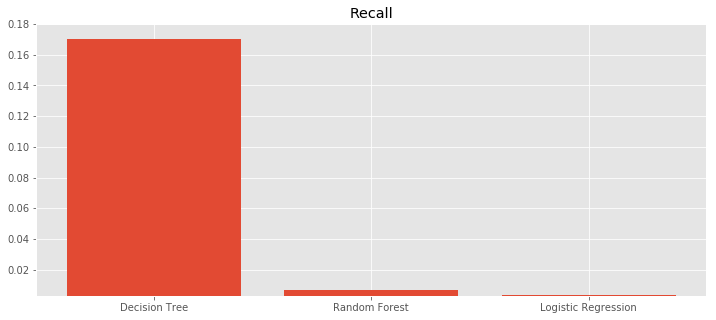

In [646]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально сравнить)
# Возможно вас удивит качество! Но задача подобрана специально ;) Такое качество тоже бывает

## Your Code Here

ind = np.array(['Decision Tree', 'Random Forest', 'Logistic Regression'])
y2 = [recall_dtc, recall_rfc, recall_lgr]

fig = plt.figure(1)
ax = fig.add_subplot(1, 1, 1)
plt.bar(ind, y2)
plt.ylim(0.003,.18)  # set y axis limits
#ax.set_yscale('log')
plt.title('Recall')

plt.show()


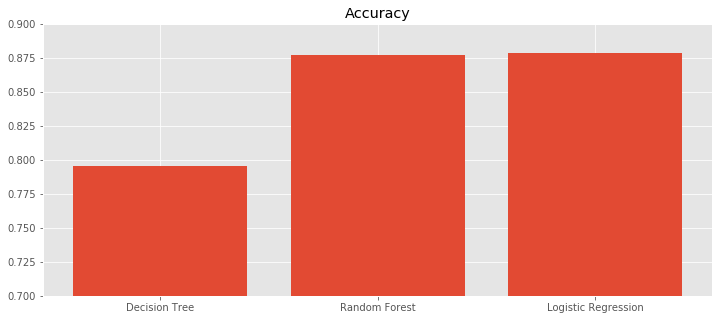

In [647]:
ind = np.array(['Decision Tree', 'Random Forest', 'Logistic Regression'])
y2 = [accuracy_dtc, accuracy_rfc, accuracy_lgr]

fig = plt.figure(1)
ax = fig.add_subplot(1, 1, 1)
plt.bar(ind, y2)
plt.ylim(0.7,.9)  # set y axis limits
#ax.set_yscale('log')
plt.title('Accuracy')

plt.show()

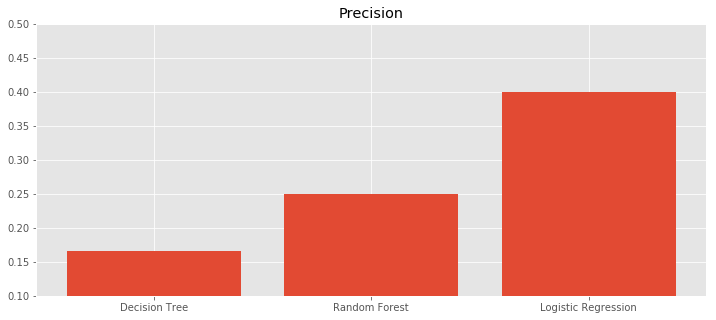

In [648]:
ind = np.array(['Decision Tree', 'Random Forest', 'Logistic Regression'])
y2 = [precision_dtc, precision_rfc, precision_lgr]

fig = plt.figure(1)
ax = fig.add_subplot(1, 1, 1)
plt.bar(ind, y2)
plt.ylim(0.1,.5)  # set y axis limits
#ax.set_yscale('log')
plt.title('Precision')

plt.show()

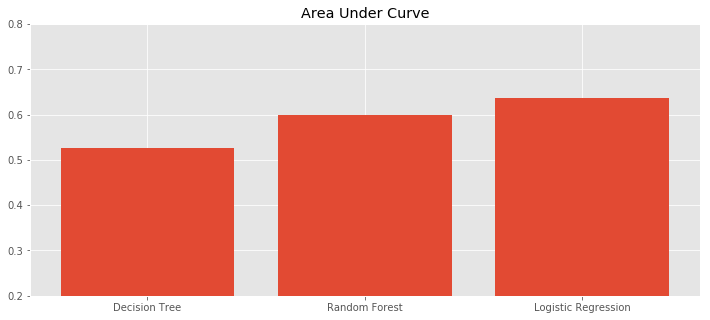

In [650]:
ind = np.array(['Decision Tree', 'Random Forest', 'Logistic Regression'])
y2 = [auc_dtc, auc_rfc, auc_lgr]

fig = plt.figure(1)
ax = fig.add_subplot(1, 1, 1)
plt.bar(ind, y2)
plt.ylim(0.2,.8)  # set y axis limits
#ax.set_yscale('log')
plt.title('Area Under Curve')

plt.show()

ROC-AUC для Logistic Regression: 0.636
ROC-AUC для Decision Tree: 0.526
ROC-AUC для Random Forest: 0.600


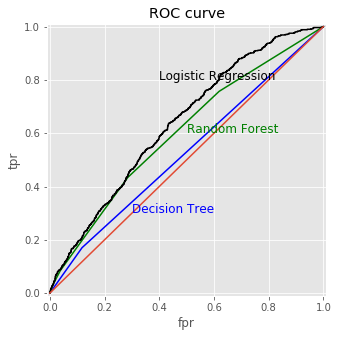

In [651]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе
# Подпишите оси и линии

## Your Code Here
fpr_rfc, tpr_rfc, thresholds = roc_curve(y_valid, predict_rfc_proba[:,1])
fpr_dtc, tpr_dtc, thresholds = roc_curve(y_valid, predict_dtc_proba[:,1])
fpr_lgr, tpr_lgr, thresholds = roc_curve(y_valid, predict_lgr_proba[:,1])
plt.figure(figsize=(5, 5))
plt.text(0.4,0.8,'Logistic Regression', color = 'black', size = 'large')
plt.text(0.3,0.3,'Decision Tree', color = 'blue', size = 'large')
plt.text(0.5,0.6,'Random Forest', color = 'green', size = 'large')
plt.plot(fpr_dtc, tpr_dtc,color='blue')
plt.plot(fpr_rfc, tpr_rfc,color='green')
plt.plot(fpr_lgr, tpr_lgr,color='black')
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))
print('ROC-AUC для Logistic Regression: {:.3f}'.format(auc_lgr) )
print('ROC-AUC для Decision Tree: {:.3f}'.format(auc_dtc) )
print('ROC-AUC для Random Forest: {:.3f}'.format(auc_rfc) )

In [652]:
from sklearn.cross_validation import cross_val_score
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc

## Your Code Here

#rfc = RandomForestClassifier()
rfc_arr=cross_val_score(rfc,X_train,y_train,scoring='roc_auc',cv=10)
rfc_mean  = rfc_arr.mean()

print('средний roc_auc для RandomForestClassifier ',rfc_mean)

средний roc_auc для RandomForestClassifier  0.5784651006176982


In [653]:
dtc_arr=cross_val_score(dtc,X_train,y_train,scoring='roc_auc',cv=10)
dtc_mean  = dtc_arr.mean()
#print(*dtc_arr)
print('средний roc_auc для DecisionTreeClassifier ',dtc_mean)

средний roc_auc для DecisionTreeClassifier  0.5218812720183941


In [654]:
lgr_arr = cross_val_score(lgr,X_train,y_train,scoring='roc_auc',cv=10)
lgr_mean  = lgr_arr.mean()

print('средний roc_auc для LogisticRegression ',lgr_mean)

средний roc_auc для LogisticRegression  0.6284246695730011


In [655]:
# Взять лучшую модель и сделать предсказания (с вероятностями (!!!)) для test выборки
## Your Code Here
from sklearn.metrics import roc_auc_score

predict_proba_lgr_test = lgr.predict_proba(X_test)[:,1]
auc_test = roc_auc_score(y_test, predict_proba_lgr_test)
print("Результат работы модели логистической регрессии на тестовой выборке: ", auc_test)

Результат работы модели логистической регрессии на тестовой выборке:  0.6177885366912723


ROC-AUC для Logistic Regression на тестовой выборке: 0.618


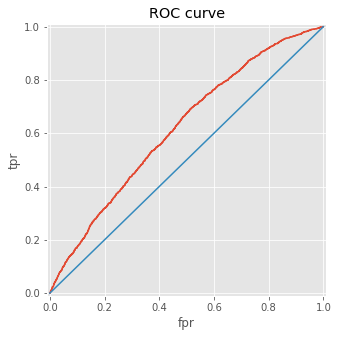

In [656]:
# Померить roc_auc на тесте
# Вывести текстом и на графике =)

## Your Code Here
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_test, predict_proba_lgr_test)
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))
print('ROC-AUC для Logistic Regression на тестовой выборке: {:.3f}'.format(auc_test) )

### Больше обязательных заданий нет, но ниже вы можете провести исследование, поиграться с данными
### Это возможность написать код, который я посмотрю и в случае чего откомметирую. ;)
### Это не оценивается и остается на ваше усмотрение. Просто дополнительная возможность

In [1]:
### И далее ;)